In [16]:
!pip install yfinance

In [0]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta, timezone
import warnings
warnings.filterwarnings('ignore')

In [18]:
tesla = ['TSLA']
tesla_equity_prices = yf.download(tesla,start = '2017-01-01',end = '2020-06-05',
                              interval='1d', prepost=True)
tesla_equity_prices["Average"] = (tesla_equity_prices["High"] + tesla_equity_prices["Low"])/2

volkswagen=['VOW3.DE']
wagen_equity_prices=yf.download(volkswagen,start='2017-01-01',end = '2020-06-05',interval='1d', prepost=True)
wagen_equity_prices['Average'] = (wagen_equity_prices['High'] + wagen_equity_prices['Low'])/2

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
len(tesla_equity_prices)

861

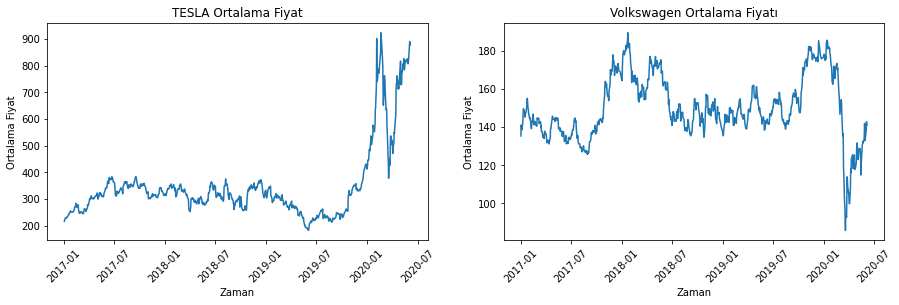

In [20]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.lineplot(x = tesla_equity_prices.index, y = tesla_equity_prices.Average)
plt.title("TESLA Ortalama Fiyat")
plt.xlabel("Zaman")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation = 45)

plt.subplot(122)
sns.lineplot(x = wagen_equity_prices.index, y = wagen_equity_prices.Average)
plt.title("Volkswagen Ortalama Fiyatı")
plt.xlabel("Zaman")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation = 45)

plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
input_data_tesla=tesla_equity_prices.iloc[4:,[5,6]].values
input_data_wagen=wagen_equity_prices.iloc[:,[5,6]].values
scaler=MinMaxScaler(feature_range=(0,1))
input_data_tesla=scaler.fit_transform(input_data_tesla[:,:])
input_data_wagen=scaler.fit_transform(input_data_wagen[:,:])

In [0]:
input_data_tesla,input_data_wagen=np.array(input_data_tesla),np.array(input_data_wagen)

In [24]:
len(input_data_wagen)

865

In [0]:
duration=50

X_tesla, y_tesla, X_wagen, y_wagen=[], [], [], []

for i in range(0, len(input_data_tesla)-duration):
  a=input_data_tesla[i:i+duration]
  b=input_data_wagen[i:i+duration]

  X_tesla.append(a)
  X_wagen.append(b)

  y_tesla.append(input_data_tesla[i+duration][1])
  y_wagen.append(input_data_wagen[i+duration][1])

In [0]:
X_tesla=np.reshape(X_tesla, (np.shape(X_tesla)[0], np.shape(X_tesla)[1], np.shape(X_tesla)[2]))
y_tesla=np.reshape(y_tesla, (np.shape(y_tesla)[0], 1))

X_wagen=np.reshape(X_wagen, (np.shape(X_wagen)[0], np.shape(X_wagen)[1], np.shape(X_wagen)[2]))
y_wagen=np.reshape(y_wagen, (np.shape(y_wagen)[0], 1))

In [0]:
#The input data must be 3 dimension, lets reshape input datas.
#For TESLA
test_size=int(.3 * len(tesla_equity_prices))

X_tesla_train=X_tesla[0:len(X_tesla)-test_size]
y_tesla_train=y_tesla[0:len(y_tesla)-test_size]

X_tesla_test=X_tesla[len(X_tesla)-test_size:len(X_tesla)]
y_tesla_test=y_tesla[len(y_tesla)-test_size:len(y_tesla)]

In [0]:
#For Volkswagen
test_size=int(.3 * len(wagen_equity_prices))

X_wagen_train=X_wagen[0:len(X_wagen)-test_size]
y_wagen_train=y_wagen[0:len(y_wagen)-test_size]

X_wagen_test=X_wagen[len(X_wagen)-test_size:len(X_wagen)]
y_wagen_test=y_wagen[len(y_wagen)-test_size:len(y_wagen)]

In [31]:
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [32]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X_tesla_train.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
model.fit(X_tesla_train, y_tesla_train, epochs=500, batch_size=32, verbose=0)

In [37]:
model2 = Sequential()
model2.add(LSTM(units=30, return_sequences= True, input_shape=(X_wagen_train.shape[1],2)))
model2.add(LSTM(units=30, return_sequences= True))
model2.add(LSTM(units=30))
model2.add(Dense(units=1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_6 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [39]:
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_wagen_train, y_wagen_train, epochs=500, batch_size=32, verbose=0)

In [0]:
pred_tesla= model.predict(X_tesla_test)
pred_wagen= model2.predict(X_wagen_test)

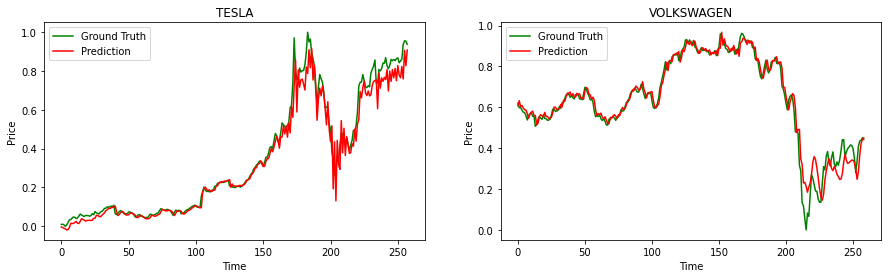

In [46]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(y_tesla_test, color='green', label="Ground Truth")
plt.plot(pred_tesla, color= 'red', label="Prediction")
plt.title("TESLA")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

plt.subplot(122)
plt.plot(y_wagen_test, color='green', label="Ground Truth")
plt.plot(pred_wagen, color= 'red', label="Prediction")
plt.title("VOLKSWAGEN")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

plt.show()